98.9832749902761


/home/amir/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/amir/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/amir/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/amir/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


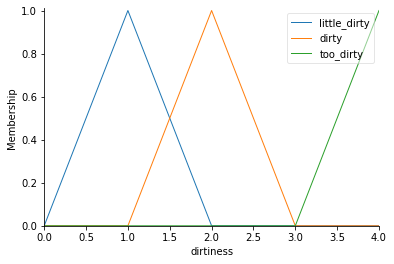

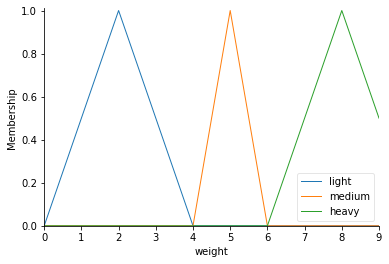

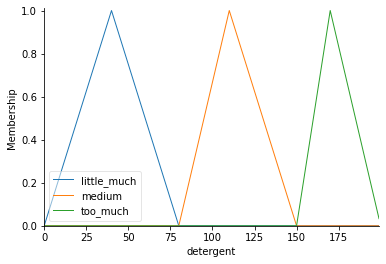

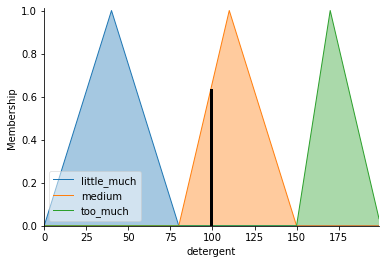

In [24]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl




dirtiness = ctrl.Antecedent(np.arange(0, 5 , 1), 'dirtiness')
dirtiness['little_dirty'] = fuzz.trimf(dirtiness.universe, [0, 1, 2])
dirtiness['dirty'] = fuzz.trimf(dirtiness.universe, [2, 2, 3])
dirtiness['too_dirty'] = fuzz.trimf(dirtiness.universe, [3, 4, 5])


weight = ctrl.Antecedent(np.arange(0, 10, 1), 'weight')
weight['light'] = fuzz.trimf(weight.universe, [0, 2, 4])
weight['medium'] = fuzz.trimf(weight.universe, [4, 5, 6])
weight['heavy'] = fuzz.trimf(weight.universe, [6, 8, 10])

detergent = ctrl.Consequent(np.arange(0, 200, 1), 'detergent')
detergent['little_much'] = fuzz.trimf(detergent.universe, [0, 40, 80])
detergent['medium'] = fuzz.trimf(detergent.universe, [80, 110, 150])
detergent['too_much'] = fuzz.trimf(detergent.universe, [150, 170, 200])


rule1a = ctrl.Rule(dirtiness['little_dirty'] | weight['light'], detergent['little_much'])
rule1b = ctrl.Rule(dirtiness['little_dirty'] | weight['medium'], detergent['little_much'])
rule1c = ctrl.Rule(dirtiness['little_dirty'] | weight['heavy'], detergent['medium'])

rule2a = ctrl.Rule(dirtiness['dirty'] | weight['light'], detergent['little_much'])
rule2b = ctrl.Rule(dirtiness['dirty'] | weight['medium'], detergent['medium'])
rule2c = ctrl.Rule(dirtiness['dirty'] | weight['heavy'], detergent['too_much'])

rule3a = ctrl.Rule(dirtiness['too_dirty'] | weight['light'], detergent['medium'])
rule3b = ctrl.Rule(dirtiness['too_dirty'] | weight['medium'], detergent['too_much'])
rule3c = ctrl.Rule(dirtiness['too_dirty'] | weight['heavy'], detergent['too_much'])



detergent_ctrl = ctrl.ControlSystem(
    [rule1a, rule1b, rule1c, rule2a, rule2b, rule2c, rule3a, rule3b, rule3c])
det_amount = ctrl.ControlSystemSimulation(detergent_ctrl)

dirtiness.view()
x = 2
weight.view()
y = 5
detergent.view()

det_amount.input['dirtiness'] = int(x)
det_amount.input['weight'] = int(y)

det_amount.compute()
print(det_amount.output['detergent'])
detergent.view(sim=det_amount)
